import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Uploading Dataset

In [4]:
df_customer=pd.read_excel("Customers.xlsx")
df_orders=pd.read_excel("Orders.xlsx")

In [5]:
df_customer.head()

,Name,Order ID,Order Date,Product ID,City,State
0,Adwait,80801,2022-01-01,101,Hyderabad,Telangana
1,Chitra,80802,2022-01-02,102,Bhopal,Madhya Pradesh
2,Gopal,80803,2022-01-03,103,Bengaluru,Karnataka
3,Rishabh,80804,2022-01-04,104,Pune,Maharashtra
4,Madhav,80805,2022-01-05,105,Mathura,Uttar Pradesh


In [6]:
df_orders.head()

,Order ID,Product ID,Product,Product State,Selling Price,Product Cost,Quantity
0,80801,101,Malapua,Bihar,300,250,21.0
1,80802,102,Dhokla,Gujarat,575,90,19.0
2,80803,103,Mysore pak,Karnataka,275,250,18.0
3,80804,104,Modak,Maharashtra,250,185,10.0
4,80805,105,Gajar ka halwa,Punjab,1250,150,9.0


In [7]:
merged_df=pd.merge(df_customer, df_orders)
print(merged_df)

       Name  Order ID Order Date  Product ID       City           State  \
0    Adwait     80801 2022-01-01         101  Hyderabad       Telangana   
1    Chitra     80802 2022-01-02         102     Bhopal  Madhya Pradesh   
2     Gopal     80803 2022-01-03         103  Bengaluru       Karnataka   
3   Rishabh     80804 2022-01-04         104       Pune     Maharashtra   
4    Madhav     80805 2022-01-05         105    Mathura   Uttar Pradesh   
..      ...       ...        ...         ...        ...             ...   
95   Madhav     80896 2022-03-31         105    Mathura   Uttar Pradesh   
96   Adwait     80897 2022-03-31         106  Hyderabad       Telangana   
97   Chitra     80898 2022-03-31         107     Bhopal  Madhya Pradesh   
98    Gopal     80899 2022-03-31         108  Bengaluru       Karnataka   
99  Rishabh     80900 2022-03-31         109       Pune     Maharashtra   

           Product  Product State  Selling Price  Product Cost  Quantity  
0          Malapua      

Check Null Values

In [8]:
merged_df.isnull().sum()

Name             0
Order ID         0
Order Date       0
Product ID       0
City             0
State            0
Product          0
Product State    0
Selling Price    0
Product Cost     0
Quantity         0
dtype: int64

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       100 non-null    int64  
 1   Product ID     100 non-null    int64  
 2   Product        100 non-null    object 
 3   Product State  100 non-null    object 
 4   Selling Price  100 non-null    int64  
 5   Product Cost   100 non-null    int64  
 6   Quantity       100 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


In [10]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        100 non-null    object        
 1   Order ID    100 non-null    int64         
 2   Order Date  100 non-null    datetime64[ns]
 3   Product ID  100 non-null    int64         
 4   City        100 non-null    object        
 5   State       100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ KB


In [12]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')
merged_df['Month'] = merged_df['Order Date'].dt.strftime('%B')
print(merged_df['Month'])



0     January
1     January
2     January
3     January
4     January
       ...   
95      March
96      March
97      March
98      March
99      March
Name: Month, Length: 100, dtype: object


Create"Sales Amount","Actual Price & "Profit" Columns

In [19]:
merged_df['Sales Amount'] = merged_df['Selling Price'] * merged_df['Quantity']
merged_df['Actual Price'] = merged_df['Product Cost'] * merged_df['Quantity']
merged_df['Profit'] = merged_df['Sales Amount'] - merged_df['Actual Price']

In [16]:
merged_df.sample(5)

,Name,Order ID,Order Date,Product ID,City,State,Product,Product State,Selling Price,Product Cost,Quantity,Month,Sales Amount,Actual Price,Profit
18,Rishabh,80819,2022-01-19,109,Pune,Maharashtra,Rasgulla,West Bengal,45,25,40.0,January,1800.0,1000.0,800.0
55,Gopal,80856,2022-02-25,109,Bengaluru,Karnataka,Rasgulla,West Bengal,45,25,31.0,February,1395.0,775.0,620.0
52,Madhav,80853,2022-02-22,108,Mathura,Uttar Pradesh,Peda,Uttar Pradesh,700,300,15.0,February,10500.0,4500.0,6000.0
21,Chitra,80822,2022-01-22,110,Bhopal,Madhya Pradesh,Pani puri,Uttar Pradesh,20,5,44.0,January,880.0,220.0,660.0
78,Adwait,80879,2022-03-20,106,Hyderabad,Telangana,Ghevar,Rajasthan,500,250,32.0,March,16000.0,8000.0,8000.0


In [14]:
df_orders=pd.read_excel("Orders.xlsx")
df_customer=pd.read_excel("Customers.xlsx")
merged_df=pd.merge(df_customer, df_orders)
merged_df['Product'].unique()

array(['Malapua', 'Dhokla', 'Mysore pak', 'Modak', 'Gajar ka halwa',
       'Ghevar', 'Jalebi', 'Peda', 'Rasgulla', 'Pani puri'], dtype=object)

In [16]:
products=merged_df.groupby("Product").agg({'Product':"count"})
print(products)

                Product
Product                
Dhokla               11
Gajar ka halwa        6
Ghevar                6
Jalebi                8
Malapua              10
Modak                 7
Mysore pak            7
Pani puri            18
Peda                 10
Rasgulla             17


Customer's City VS Sales Amount

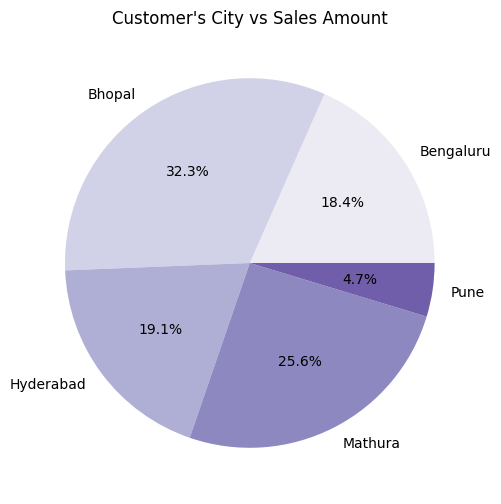

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_df['Sales Amount'] = merged_df['Selling Price'] * merged_df['Quantity']
city_sales = merged_df.groupby('City')['Sales Amount'].sum().reset_index()

palette_color = sns.color_palette("Purples")

plt.figure(figsize=(8, 6))
plt.pie(city_sales['Sales Amount'], labels=city_sales['City'], autopct='%1.1f%%', colors=palette_color)
plt.title("Customer's City vs Sales Amount")
plt.show()

Product State VS Sales Amount

C:\Users\hp\AppData\Local\Temp\ipykernel_13992\3014484870.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  bar_plot = sns.lineplot(x='Product State', y='Sales Amount', data=product_state_sales, palette='Blues')


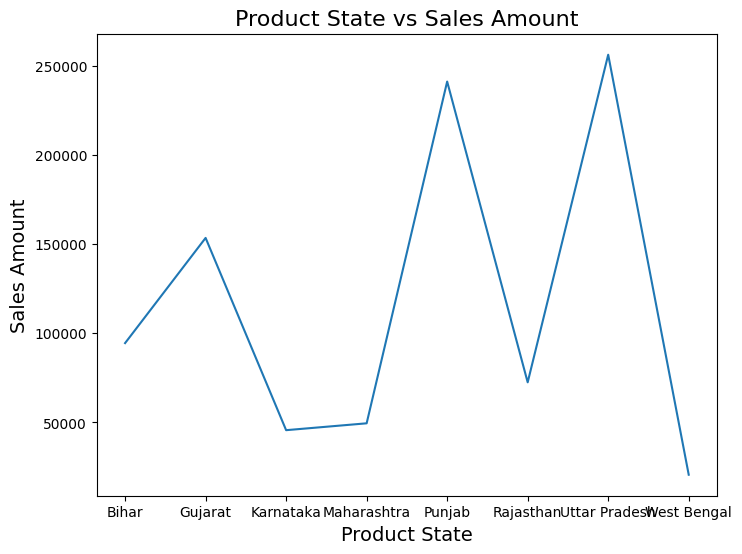

In [25]:
product_state_sales = merged_df.groupby('Product State')['Sales Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
bar_plot = sns.lineplot(x='Product State', y='Sales Amount', data=product_state_sales, palette='Blues')

plt.xlabel('Product State', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.title('Product State vs Sales Amount', fontsize=16)

plt.show()

Product State VS Profit Amount

C:\Users\hp\AppData\Local\Temp\ipykernel_13992\3442207046.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  bar_plot = sns.lineplot(x='Product State', y='Profit', data=product_state_profit, palette='Blues')


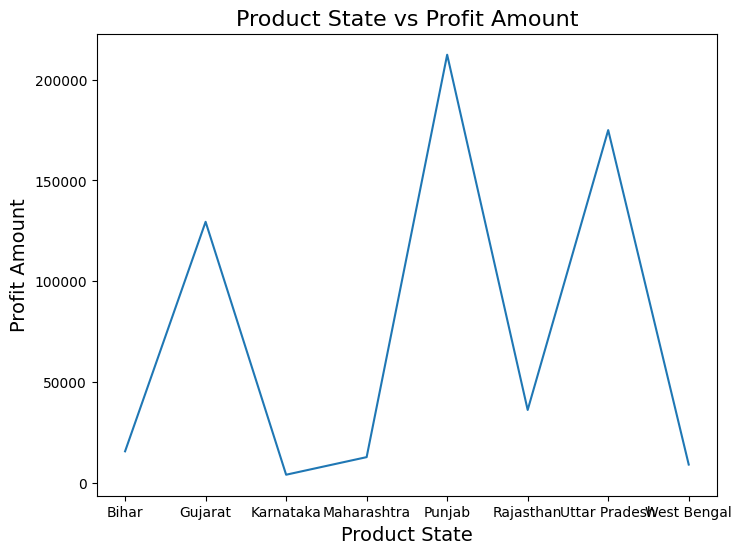

In [26]:
product_state_profit = merged_df.groupby('Product State')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 6))
bar_plot = sns.lineplot(x='Product State', y='Profit', data=product_state_profit, palette='Blues')

plt.xlabel('Product State', fontsize=14)
plt.ylabel('Profit Amount', fontsize=14)
plt.title('Product State vs Profit Amount', fontsize=16)



plt.show()

Products VS Sales Amount

C:\Users\hp\AppData\Local\Temp\ipykernel_13992\4142497639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Product', y='Sales Amount', data=product_sales, palette='Blues')


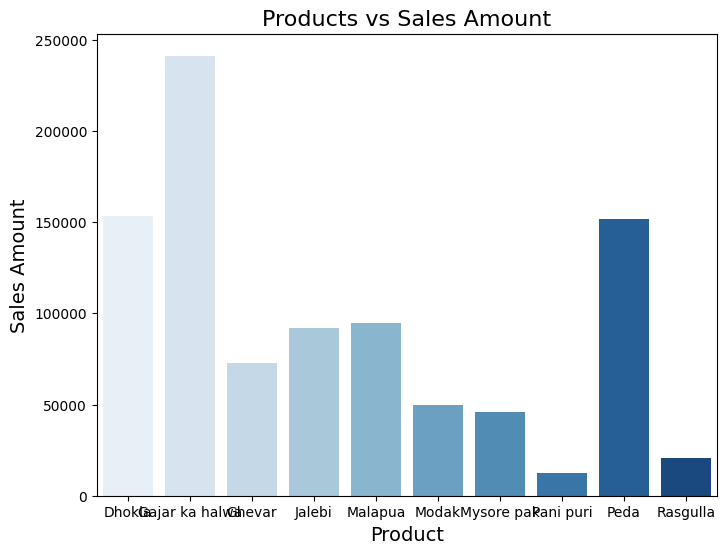

In [27]:
product_sales = merged_df.groupby('Product')['Sales Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Product', y='Sales Amount', data=product_sales, palette='Blues')

plt.xlabel('Product', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.title('Products vs Sales Amount', fontsize=16)



plt.show()